# Lab4.2 : Data Proprocessing: Data Cleaning and FeatureEngineering

###  1. Load package 
* **numpy, pandas, matplotlib.pyplot, seabon**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





### 2. Load dataset: creditcard_customer_churn.csv

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard_customer_churn.csv")

# Display the first few rows of the dataset
df.head()




,RowId,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited
0,1,15634602.0,Laura Gomez,619,France,$60K - $80K,Female,1/1/1957,Married,0.00,Blue,101348.88,YES
1,2,15647311.0,Park Min Woo,608,Spain,Less than $40K,M,1/1/1954,Single,83807.86,Blue,112542.58,NO
2,3,15619304.0,Michael Chen,502,France,$80K - $120K,Male,1/1/1965,Married,159660.80,Blue,113931.57,YES
3,4,15701354.0,Sofia Rossi,699,France,Less than $40K,F,1/1/1984,Unknown,0.00,Blue,93826.63,NO
4,5,15737888.0,Rachel Sanders,850,Spain,$60K - $80K,Male,1/1/1981,Married,125510.82,Blue,79084.10,NO


### 3. Check null value

In [3]:
# check null value
df.isnull().sum()


RowId              0
CustomerId         1
CustomerName       2
CreditScore        0
Geography          1
Income_Category    0
Gender             5
DateOfBirth        0
Marital_Status     0
Balance            0
Card_Category      0
EstimatedSalary    0
Exited             0
dtype: int64

### 4.1 Drop row of column of CustomerId, CustomerName and Gender is "Null"

In [4]:
# Drop subset column of CustomerId, CustomerName and Gender is "Null"
df.dropna(subset=['CustomerId', 'CustomerName', 'Gender'], inplace=True)


In [5]:
#Check null value
df.isnull().sum()

RowId              0
CustomerId         0
CustomerName       0
CreditScore        0
Geography          1
Income_Category    0
Gender             0
DateOfBirth        0
Marital_Status     0
Balance            0
Card_Category      0
EstimatedSalary    0
Exited             0
dtype: int64

### 4.2 Drop column "RowId", axis=1,inplace=True)

In [6]:
#drop row RowId
df.drop('RowId', axis=1, inplace=True)


In [7]:
df.head()

,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited
0,15634602.0,Laura Gomez,619,France,$60K - $80K,Female,1/1/1957,Married,0.00,Blue,101348.88,YES
1,15647311.0,Park Min Woo,608,Spain,Less than $40K,M,1/1/1954,Single,83807.86,Blue,112542.58,NO
2,15619304.0,Michael Chen,502,France,$80K - $120K,Male,1/1/1965,Married,159660.80,Blue,113931.57,YES
3,15701354.0,Sofia Rossi,699,France,Less than $40K,F,1/1/1984,Unknown,0.00,Blue,93826.63,NO
4,15737888.0,Rachel Sanders,850,Spain,$60K - $80K,Male,1/1/1981,Married,125510.82,Blue,79084.10,NO


### 5. Fill null value "France" in column "Geography"
* df['DataFrame_Column'] = df['DataFrame_Column'].fillna(0) # fill in missing for a singular colunm

In [8]:
#Fill "France" value in column "Geography" of null value
df['Geography'] = df['Geography'].fillna("France")


In [9]:
#Check isnull value
df.isnull().sum()

CustomerId         0
CustomerName       0
CreditScore        0
Geography          0
Income_Category    0
Gender             0
DateOfBirth        0
Marital_Status     0
Balance            0
Card_Category      0
EstimatedSalary    0
Exited             0
dtype: int64

### 6. Check unique value in each column

In [11]:
# Check unique value
df.nunique()



CustomerId         192
CustomerName       170
CreditScore        147
Geography            3
Income_Category      6
Gender               4
DateOfBirth         41
Marital_Status       4
Balance            120
Card_Category        3
EstimatedSalary    192
Exited               2
dtype: int64

In [12]:
# check column "Gender" in unique value
df.Gender.unique()

array(['Female', 'M', 'Male', 'F'], dtype=object)

### 6.1 Plot countplot graph in column "Gender"

<Axes: xlabel='Gender', ylabel='count'>

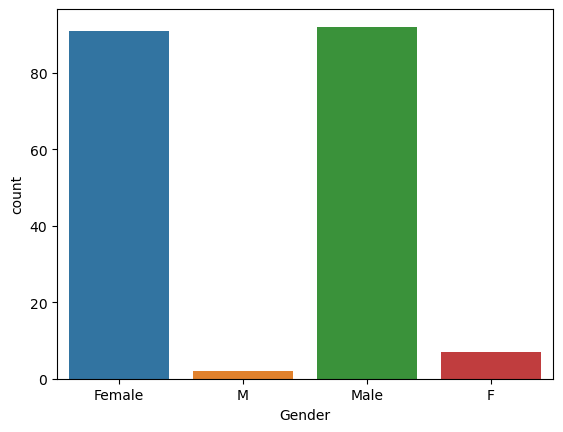

In [13]:
sns.countplot(x=df.Gender)

### 6.2 Replace value in column Gender from  "M" to "Male" and "F" to "Female"

In [14]:
# replace M to Male
df.Gender.replace("M","Male",inplace = True)
#replace F to Female
df.Gender.replace("F","Female",inplace = True)


<Axes: xlabel='Gender', ylabel='count'>

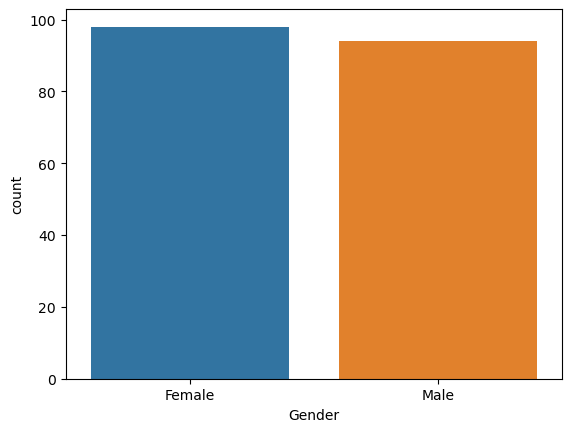

In [15]:
#plot count graph
sns.countplot(x=df.Gender)

In [16]:
df.head()

,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited
0,15634602.0,Laura Gomez,619,France,$60K - $80K,Female,1/1/1957,Married,0.00,Blue,101348.88,YES
1,15647311.0,Park Min Woo,608,Spain,Less than $40K,Male,1/1/1954,Single,83807.86,Blue,112542.58,NO
2,15619304.0,Michael Chen,502,France,$80K - $120K,Male,1/1/1965,Married,159660.80,Blue,113931.57,YES
3,15701354.0,Sofia Rossi,699,France,Less than $40K,Female,1/1/1984,Unknown,0.00,Blue,93826.63,NO
4,15737888.0,Rachel Sanders,850,Spain,$60K - $80K,Male,1/1/1981,Married,125510.82,Blue,79084.10,NO


### 7.1 Check DataFrame information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       192 non-null    float64
 1   CustomerName     192 non-null    object 
 2   CreditScore      192 non-null    int64  
 3   Geography        192 non-null    object 
 4   Income_Category  192 non-null    object 
 5   Gender           192 non-null    object 
 6   DateOfBirth      192 non-null    object 
 7   Marital_Status   192 non-null    object 
 8   Balance          192 non-null    float64
 9   Card_Category    192 non-null    object 
 10  EstimatedSalary  192 non-null    float64
 11  Exited           192 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 19.5+ KB


### 7.2 Change Type of CustomerId from float to int by using
* **"ColumnName.astype(int)"**

In [18]:
#change datatype "CustomerId" :  is integer
df['CustomerId'] = df['CustomerId'].astype(int)


### 7.3 Change Type of DateOfBirth from object to DateTime by using 
* **"columnName = pd.to_datetime(columnName)"**

In [19]:
#Change "DateOfBirth" in datatype of datetime

df.DateOfBirth = pd.to_datetime(df.DateOfBirth)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerId       192 non-null    int32         
 1   CustomerName     192 non-null    object        
 2   CreditScore      192 non-null    int64         
 3   Geography        192 non-null    object        
 4   Income_Category  192 non-null    object        
 5   Gender           192 non-null    object        
 6   DateOfBirth      192 non-null    datetime64[ns]
 7   Marital_Status   192 non-null    object        
 8   Balance          192 non-null    float64       
 9   Card_Category    192 non-null    object        
 10  EstimatedSalary  192 non-null    float64       
 11  Exited           192 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7)
memory usage: 18.8+ KB


In [21]:
df.head()

,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited
0,15634602,Laura Gomez,619,France,$60K - $80K,Female,1957-01-01,Married,0.00,Blue,101348.88,YES
1,15647311,Park Min Woo,608,Spain,Less than $40K,Male,1954-01-01,Single,83807.86,Blue,112542.58,NO
2,15619304,Michael Chen,502,France,$80K - $120K,Male,1965-01-01,Married,159660.80,Blue,113931.57,YES
3,15701354,Sofia Rossi,699,France,Less than $40K,Female,1984-01-01,Unknown,0.00,Blue,93826.63,NO
4,15737888,Rachel Sanders,850,Spain,$60K - $80K,Male,1981-01-01,Married,125510.82,Blue,79084.10,NO


### 7.1 Sort by CustomerName 
* **DataFrame.sort_values(by=[column], ascending =True, inplace = True)**

In [22]:
#Sort by Cutomer Name
df.sort_values(by='CustomerName', ascending=True, inplace=True)
df.head()




,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited
125,15627360,Adam Odonnell,432,France,$60K - $80K,Male,1976-01-01,Single,152603.45,Blue,110265.24,YES
17,15788218,Alex Kim,549,Spain,$80K - $120K,Female,1946-01-01,Married,0.00,Blue,14406.41,NO
59,15804771,Alex Ng,614,France,$60K - $80K,Male,1968-01-01,Single,40685.92,Blue,46775.28,NO
60,15651280,Alice Smith,742,Germany,$80K - $120K,Male,1982-01-01,Married,136857.00,Blue,84509.57,NO
21,15597945,Amanda Chen,636,Spain,Less than $40K,Female,1979-01-01,Married,0.00,Blue,138555.46,NO


### 7.2 Create a new DataFrame "df_query" from -> Query data by Geography is "Spain"
* **DataFrame.query(“ condition ”, inplace = True)**

In [23]:
#Create new Data Frame from Query data by Geography is "Spain
df_query = df.query('Geography == "Spain"')
df_query.head()




,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited
17,15788218,Alex Kim,549,Spain,$80K - $120K,Female,1946-01-01,Married,0.00,Blue,14406.41,NO
21,15597945,Amanda Chen,636,Spain,Less than $40K,Female,1979-01-01,Married,0.00,Blue,138555.46,NO
196,15635905,Ana Hernandez,616,Spain,$120K +,Female,1972-01-01,Unknown,0.00,Blue,43001.46,NO
175,15755209,Cameron Leonard,484,Spain,$40K - $60K,Female,1972-01-01,Divorced,133868.21,Blue,27286.10,NO
139,15640905,Carol Jones,579,Spain,Less than $40K,Female,1980-01-01,Single,129490.36,Blue,8590.83,YES


### 7.3 From df_query : Filter column in "CustomerId", "CustomerName","Income_Category","Gender" and "Exited"
* **DataFrame.filter([column])**

In [24]:
#Filter column in "CustomerId", "CustomerName","Income_Category","Gender" and "Exited"
df_filter = df_query.filter(items=['CustomerId', 'CustomerName','Income_Category','Gender','Exited'])
df_filter.head()



,CustomerId,CustomerName,Income_Category,Gender,Exited
17,15788218,Alex Kim,$80K - $120K,Female,NO
21,15597945,Amanda Chen,Less than $40K,Female,NO
196,15635905,Ana Hernandez,$120K +,Female,NO
175,15755209,Cameron Leonard,$40K - $60K,Female,NO
139,15640905,Carol Jones,Less than $40K,Female,YES


## 8: Data Transformation: Feature Engineering
### 8.1 : Using [ ] to add a new column From datafram df
* **Create new column in "BirthYear" from column "DateOfBirth"

In [25]:
# Create column "BirthYear" from split data from column "DateOfBirth"
df['BirthYear'] = df['DateOfBirth'].dt.year
df.head()


,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear
125,15627360,Adam Odonnell,432,France,$60K - $80K,Male,1976-01-01,Single,152603.45,Blue,110265.24,YES,1976
17,15788218,Alex Kim,549,Spain,$80K - $120K,Female,1946-01-01,Married,0.00,Blue,14406.41,NO,1946
59,15804771,Alex Ng,614,France,$60K - $80K,Male,1968-01-01,Single,40685.92,Blue,46775.28,NO,1968
60,15651280,Alice Smith,742,Germany,$80K - $120K,Male,1982-01-01,Married,136857.00,Blue,84509.57,NO,1982
21,15597945,Amanda Chen,636,Spain,Less than $40K,Female,1979-01-01,Married,0.00,Blue,138555.46,NO,1979


### 8.2: Create new column "Age" from Current DataTime -  BirthYear
* **import package: from datetime import datetime as dt
* **convert type to interger using fuction astype(int)

In [26]:
from datetime import datetime as dt
print(dt.today().year)

2024


In [27]:
# Create column "Age" from Current DataTime - BirthYear
df['Age'] = dt.today().year - df['BirthYear']



In [28]:
#show 5 first rows
df.head()

,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age
125,15627360,Adam Odonnell,432,France,$60K - $80K,Male,1976-01-01,Single,152603.45,Blue,110265.24,YES,1976,48
17,15788218,Alex Kim,549,Spain,$80K - $120K,Female,1946-01-01,Married,0.00,Blue,14406.41,NO,1946,78
59,15804771,Alex Ng,614,France,$60K - $80K,Male,1968-01-01,Single,40685.92,Blue,46775.28,NO,1968,56
60,15651280,Alice Smith,742,Germany,$80K - $120K,Male,1982-01-01,Married,136857.00,Blue,84509.57,NO,1982,42
21,15597945,Amanda Chen,636,Spain,Less than $40K,Female,1979-01-01,Married,0.00,Blue,138555.46,NO,1979,45


### 8.3: Using apply() function used to manipulate values
* **#Create column "FirstName" to split data from feature "CustomerName"**
* **df['FirstName'] = df.apply(lambda row: splitFullName(row.CustomerName), axis=1)**

In [29]:
# Function split Full name to FirstName and LastName, then return FirstName
def splitFullName(name):
    split = name.split(' ')
    firstName= split[0]
    return firstName

In [30]:
#Create column "FirstName" to split data from feature "CustomerName"
df['FirstName'] = df.apply(lambda row: splitFullName(row['CustomerName']), axis=1)
df.head()




,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName
125,15627360,Adam Odonnell,432,France,$60K - $80K,Male,1976-01-01,Single,152603.45,Blue,110265.24,YES,1976,48,Adam
17,15788218,Alex Kim,549,Spain,$80K - $120K,Female,1946-01-01,Married,0.00,Blue,14406.41,NO,1946,78,Alex
59,15804771,Alex Ng,614,France,$60K - $80K,Male,1968-01-01,Single,40685.92,Blue,46775.28,NO,1968,56,Alex
60,15651280,Alice Smith,742,Germany,$80K - $120K,Male,1982-01-01,Married,136857.00,Blue,84509.57,NO,1982,42,Alice
21,15597945,Amanda Chen,636,Spain,Less than $40K,Female,1979-01-01,Married,0.00,Blue,138555.46,NO,1979,45,Amanda


### 8.4: Using transform() function used to manipulate values
* **#Create column "LastName" to split data from feature "CustomerName"**
* **df['LastName'] = df['CustomerName'].transform(lambda row: row.split(' ')[1])**

In [31]:
# Create column "LastName" to split data from feature "CustomerName"
# Using lambda equivalent
df['LastName'] = df['CustomerName'].transform(lambda row: row.split(' ')[1])
df.head()




,CustomerId,CustomerName,CreditScore,Geography,Income_Category,Gender,DateOfBirth,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName,LastName
125,15627360,Adam Odonnell,432,France,$60K - $80K,Male,1976-01-01,Single,152603.45,Blue,110265.24,YES,1976,48,Adam,Odonnell
17,15788218,Alex Kim,549,Spain,$80K - $120K,Female,1946-01-01,Married,0.00,Blue,14406.41,NO,1946,78,Alex,Kim
59,15804771,Alex Ng,614,France,$60K - $80K,Male,1968-01-01,Single,40685.92,Blue,46775.28,NO,1968,56,Alex,Ng
60,15651280,Alice Smith,742,Germany,$80K - $120K,Male,1982-01-01,Married,136857.00,Blue,84509.57,NO,1982,42,Alice,Smith
21,15597945,Amanda Chen,636,Spain,Less than $40K,Female,1979-01-01,Married,0.00,Blue,138555.46,NO,1979,45,Amanda,Chen


### 8.5: Drop column "CustomerId", "CustomerName" and "DateOfBirth"
* **.drop([],axis=1,inplace=True)**

In [32]:
#Drop column "CustomerId", "CustomerName" and "DateOfBirth"
df.drop(['CustomerId', 'CustomerName', 'DateOfBirth'], axis=1, inplace=True)



In [33]:
df.head()

,CreditScore,Geography,Income_Category,Gender,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName,LastName
125,432,France,$60K - $80K,Male,Single,152603.45,Blue,110265.24,YES,1976,48,Adam,Odonnell
17,549,Spain,$80K - $120K,Female,Married,0.00,Blue,14406.41,NO,1946,78,Alex,Kim
59,614,France,$60K - $80K,Male,Single,40685.92,Blue,46775.28,NO,1968,56,Alex,Ng
60,742,Germany,$80K - $120K,Male,Married,136857.00,Blue,84509.57,NO,1982,42,Alice,Smith
21,636,Spain,Less than $40K,Female,Married,0.00,Blue,138555.46,NO,1979,45,Amanda,Chen


### 9.1. Encoding Categorical Features: One-hot encoding
* **Using dummies values approach: df2 = pandas.get_dummies(df[columnName])**
* **Using pandas concat function for concatenating pandas object into Dataframe output**
* **df = pd.concat([df,df2],axis=1)**


In [34]:
#Transform column "Gender" all the labels 'Male', 'Female' into 1,0 binary columns
df2 = pd.get_dummies(df['Gender'],dtype=int)



In [35]:
#Using pandas concat() function for concatenating pandas objects into a Data Frame output.
df = pd.concat([df, df2], axis=1)


In [36]:
df.head()

,CreditScore,Geography,Income_Category,Gender,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName,LastName,Female,Male
125,432,France,$60K - $80K,Male,Single,152603.45,Blue,110265.24,YES,1976,48,Adam,Odonnell,0,1
17,549,Spain,$80K - $120K,Female,Married,0.00,Blue,14406.41,NO,1946,78,Alex,Kim,1,0
59,614,France,$60K - $80K,Male,Single,40685.92,Blue,46775.28,NO,1968,56,Alex,Ng,0,1
60,742,Germany,$80K - $120K,Male,Married,136857.00,Blue,84509.57,NO,1982,42,Alice,Smith,0,1
21,636,Spain,Less than $40K,Female,Married,0.00,Blue,138555.46,NO,1979,45,Amanda,Chen,1,0


### 9.2. One-hot encoding :: using Scikit learn
* **Using sci-kit learn library values approach: column "Marital_Status"**
* **encoder = preprocessing.OneHotEncoder()**
* **encoder_features = pd.DataFrame(encoder.fit_transform(df[['Marital_Status']]).toarray()**
* **df.join(encoder_features)**

In [38]:
#Using package from sklearn.preprocessing import for using the OneHotEncoder function
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder()

#perform one-hot encoding on 'team' column 
encoder_features = pd.DataFrame(encoder.fit_transform(df[['Marital_Status']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_features)
df.head()

,CreditScore,Geography,Income_Category,Gender,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName,LastName,Female,Male,0,1,2,3
125,432,France,$60K - $80K,Male,Single,152603.45,Blue,110265.24,YES,1976,48,Adam,Odonnell,0,1,0.0,0.0,1.0,0.0
17,549,Spain,$80K - $120K,Female,Married,0.00,Blue,14406.41,NO,1946,78,Alex,Kim,1,0,0.0,1.0,0.0,0.0
59,614,France,$60K - $80K,Male,Single,40685.92,Blue,46775.28,NO,1968,56,Alex,Ng,0,1,0.0,1.0,0.0,0.0
60,742,Germany,$80K - $120K,Male,Married,136857.00,Blue,84509.57,NO,1982,42,Alice,Smith,0,1,0.0,1.0,0.0,0.0
21,636,Spain,Less than $40K,Female,Married,0.00,Blue,138555.46,NO,1979,45,Amanda,Chen,1,0,1.0,0.0,0.0,0.0


In [39]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Unknown', 'Divorced'], dtype=object)

### 9.3. Rename colunm 
* **{0:'Single', 1:'Married', 2:'Unknown', 3:'Divorced'}, axis=1**

In [44]:
#Rename colunm 0,1,2,3 to 'Single', 'Married', 'Unknown', 'Divorced'
df.rename({0: 'Single', 1 : 'Married', 2 : 'Unknown', 3 : 'Divorced'},axis=1 , inplace = True)
df.head()

,CreditScore,Geography,Income_Category,Gender,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName,LastName,Female,Male,Single,Married,Unknown,Divorced
125,432,France,$60K - $80K,Male,Single,152603.45,Blue,110265.24,YES,1976,48,Adam,Odonnell,0,1,0.0,0.0,1.0,0.0
17,549,Spain,$80K - $120K,Female,Married,0.00,Blue,14406.41,NO,1946,78,Alex,Kim,1,0,0.0,1.0,0.0,0.0
59,614,France,$60K - $80K,Male,Single,40685.92,Blue,46775.28,NO,1968,56,Alex,Ng,0,1,0.0,1.0,0.0,0.0
60,742,Germany,$80K - $120K,Male,Married,136857.00,Blue,84509.57,NO,1982,42,Alice,Smith,0,1,0.0,1.0,0.0,0.0
21,636,Spain,Less than $40K,Female,Married,0.00,Blue,138555.46,NO,1979,45,Amanda,Chen,1,0,1.0,0.0,0.0,0.0


### 9.4.  Label Encoding : categorical column "Card_Category"
* **converting type of columns to 'category'**
* **df_final['Card_Category'] = df_final['Card_Category'].astype('category')**
* **Assigning numerical values and storing in another column**
* **final_df['Card_Cat_Label'] = final_df['Card_Category'].cat.codes**

In [49]:
# converting type of columns to 'category'
df['Card_Category'] = df['Card_Category'].astype('category')



In [50]:
# Assigning numerical values and storing in another column
df['Card_Category_Label'] = df['Card_Category'].cat.codes


#show data first 5 rows
df.head()

,CreditScore,Geography,Income_Category,Gender,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,Age,FirstName,LastName,Female,Male,Single,Married,Unknown,Divorced,Card_Category_Label
125,432,France,$60K - $80K,Male,Single,152603.45,0,110265.24,YES,1976,48,Adam,Odonnell,0,1,0.0,0.0,1.0,0.0,0
17,549,Spain,$80K - $120K,Female,Married,0.00,0,14406.41,NO,1946,78,Alex,Kim,1,0,0.0,1.0,0.0,0.0,0
59,614,France,$60K - $80K,Male,Single,40685.92,0,46775.28,NO,1968,56,Alex,Ng,0,1,0.0,1.0,0.0,0.0,0
60,742,Germany,$80K - $120K,Male,Married,136857.00,0,84509.57,NO,1982,42,Alice,Smith,0,1,0.0,1.0,0.0,0.0,0
21,636,Spain,Less than $40K,Female,Married,0.00,0,138555.46,NO,1979,45,Amanda,Chen,1,0,1.0,0.0,0.0,0.0,0


### 9.5.  Label Encoding : scikit Learn
* **column "Exited"**
* **labelencoder = preprocessing.LabelEncoder()**
* **df_final['Exited_Label'] = labelencoder.fit_transform(df_final['Exited'])**

In [65]:

#Using package from sklearn.preprocessing import for using the LabelEncoder function
from sklearn.preprocessing import LabelEncoder


# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['Exited_Label'] = labelencoder.fit_transform(df['Exited'])

In [67]:
df.head()

,CreditScore,Geography,Income_Category,Gender,Marital_Status,Balance,Card_Category,EstimatedSalary,Exited,BirthYear,...,FirstName,LastName,Female,Male,Single,Married,Unknown,Divorced,Card_Category_Label,Exited_Label
125,432,France,$60K - $80K,Male,Single,152603.45,0,110265.24,YES,1976,...,Adam,Odonnell,0,1,0.0,0.0,1.0,0.0,0,1
17,549,Spain,$80K - $120K,Female,Married,0.00,0,14406.41,NO,1946,...,Alex,Kim,1,0,0.0,1.0,0.0,0.0,0,0
59,614,France,$60K - $80K,Male,Single,40685.92,0,46775.28,NO,1968,...,Alex,Ng,0,1,0.0,1.0,0.0,0.0,0,0
60,742,Germany,$80K - $120K,Male,Married,136857.00,0,84509.57,NO,1982,...,Alice,Smith,0,1,0.0,1.0,0.0,0.0,0,0
21,636,Spain,Less than $40K,Female,Married,0.00,0,138555.46,NO,1979,...,Amanda,Chen,1,0,1.0,0.0,0.0,0.0,0,0


### 9.6 : Create a new datframe df_normalize
* **Select only column [["Balance","EstimatedSalary","Gender_Female","Gender_Male",	"Single","Card_Cat_Label", "Exited_Label"]] from df_final**

In [70]:
df_normalize = df.filter(["Balance","EstimatedSalary","Female","Male","Single","Card_Category_Label", "Exited_Label"])
df_normalize.head()

,Balance,EstimatedSalary,Female,Male,Single,Card_Category_Label,Exited_Label
125,152603.45,110265.24,0,1,0.0,0,1
17,0.00,14406.41,1,0,0.0,0,0
59,40685.92,46775.28,0,1,0.0,0,0
60,136857.00,84509.57,0,1,0.0,0,0
21,0.00,138555.46,1,0,1.0,0,0


### 9.7 Feature Scaling
* **Create a scaler object: scaler = preprocessing.MinMaxScaler()**
* **Fit and transform the data: df_normalize = pd.DataFrame(scaler.fit_transform(df_normalize), columns=df_normalize.columns)**

In [71]:
#Using package from sklearn.preprocessing import for using the MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()


# fit and transform the data
df_normalize = pd.DataFrame(scaler.fit_transform(df_normalize), columns=df_normalize.columns)
#Show last 10 rows
df_normalize.tail(10)

,Balance,EstimatedSalary,Female,Male,Single,Card_Category_Label,Exited_Label
182,0.570884,0.643028,0.0,1.0,0.0,0.0,1.0
183,0.298687,0.839593,1.0,0.0,0.0,0.0,0.0
184,0.478512,0.472938,1.0,0.0,0.0,1.0,0.0
185,0.000000,0.939188,1.0,0.0,0.0,0.0,0.0
186,0.631510,0.357190,0.0,1.0,0.0,0.0,0.0
187,0.423689,0.796660,1.0,0.0,0.0,0.0,0.0
188,0.000000,0.572883,1.0,0.0,0.0,0.0,0.0
189,0.000000,0.416188,0.0,1.0,0.0,0.0,0.0
190,0.482427,0.321380,0.0,1.0,0.0,0.0,0.0
191,0.000000,0.127655,1.0,0.0,0.0,0.0,0.0


In [72]:
#Kritsakorn Sukkasem 6531503005